In [6]:
import numpy as np
from qmsolve import Hamiltonian, SingleParticle, init_visualization,Å


#interaction potential
def four_gaussian_wells(particle):
	𝜇 = 1.0*Å
	σ = 0.5*Å
	V = 25.72*(4-np.exp((-(particle.x)**2 -(particle.y-𝜇)**2 -(particle.z)**2 ) / (2*σ**2))
	-np.exp((-(particle.x-𝜇)**2 -(particle.y)**2 -(particle.z)**2 ) / (2*σ**2))
	-np.exp((-(particle.x+𝜇)**2 -(particle.y)**2 -(particle.z)**2 ) / (2*σ**2))
	-np.exp((-(particle.x)**2 -(particle.y+𝜇)**2-(particle.z)**2  ) / (2*σ**2)))
	return V



H = Hamiltonian(particles = SingleParticle(), 
				potential = four_gaussian_wells, 
				spatial_ndim = 3, N = 100, extent = 5*Å)


eigenstates = H.solve( max_states = 50,  method ='lobpcg')
print(eigenstates.energies)

visualization = init_visualization(eigenstates)
visualization.plot_eigenstate(40, contrast_vals = [0.1, 0.25])
visualization.animate(contrast_vals = [0.1, 0.25])

Computing...
Took 347.07933735847473
[2264.96046141 2266.25200764 2266.25200764 2267.52650818 2363.15445618
 2363.95788791 2365.21897723 2365.21897723 2382.78839049 2382.78839049
 2384.296477   2384.30938451 2394.53134983 2396.21922447 2396.21922614
 2397.87890127 2444.50631008 2448.6792382  2448.6792382  2449.58487973
 2453.29770696 2474.66242415 2474.66242415 2483.64145271 2484.61356489
 2486.30022094 2486.30024522 2495.22678137 2495.81493636 2497.53734207
 2497.53734207 2502.73382762 2505.84958798 2505.84959315 2507.82400002
 2507.85243109 2510.45523763 2513.2663383  2513.2663383  2515.81916836
 2532.97572725 2533.66118763 2555.34364564 2555.34364564 2556.99973234
 2558.54029775 2558.54029775 2558.8620459  2561.46207815 2566.60483798]


In [10]:
visualization = init_visualization(eigenstates)
visualization.plot_eigenstate(0, contrast_vals = [0.1, 0.25])

Computing...
Took 0.013547658920288086


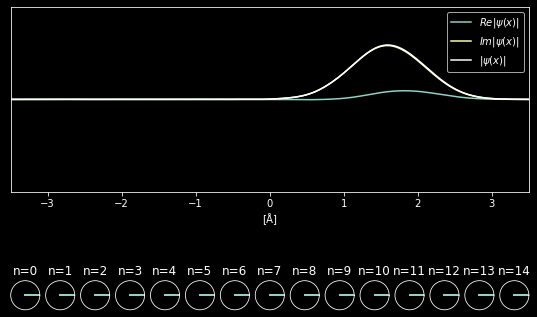

In [11]:
import numpy as np
from qmsolve import Hamiltonian,  SingleParticle, init_visualization, Å,eV


#=========================================================================================================#
#We define the Hamiltonian of a single particle confined in an harmonic oscillator potential. 
#Then, we compute its eigenstates.
#=========================================================================================================#


#interaction potential
def harmonic_oscillator(particle):

	k = 100 * eV / Å**2
	return 0.5 * k * particle.x**2


#define the Hamiltonian
H = Hamiltonian(particles = SingleParticle(), 
				potential = harmonic_oscillator, 
				spatial_ndim = 1, N = 512, extent = 20*Å)

#Diagonalize the Hamiltonian and compute the eigenstates
eigenstates = H.solve(max_states = 30)

#=========================================================================================================#
#The next lines are used for visualizing a superposition of eigenstates, where 𝜓0 is a gaussian wave packet.
#=========================================================================================================#


x = np.linspace(-1.0*Å, 1.0*Å, len(eigenstates.array[0]))
𝜓0 = np.exp(-(x-0.16*Å)**2/(2*(0.05*Å)**2))

#compute the inner product of the initial state 𝜓0(x) with the eigenstates 𝜓_n(x). (coeffs = <𝜓_n|𝜓0>)
coeffs = np.dot(eigenstates.array, 𝜓0)*1.0j

#visualize a superposition of the eigenstates
visualization = init_visualization(eigenstates)
visualization.superpositions(coeffs[0:15], xlim=[-3.5*Å, 3.5*Å])